Dataset:
The dataset used is the Titanic dataset, which is available via seaborn. It contains the following columns:

- survived (int): 0 = No, 1 = Yes.
- pclass (int): Passenger class (1st, 2nd, 3rd).
- sex (str): Gender (male, female).
- age (float): Age in years.
- sibsp (int): Number of siblings/spouses aboard.
- parch (int): Number of parents/children aboard.
- fare (float): Passenger fare.
- embarked (str): Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
- deck (str): Deck information (A, B, C, etc.), many missing values.
- embark_town (str): Town of embarkation (Cherbourg, Southampton, Queenstown).
- alive (str): Alive or deceased (yes, no).


In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [21]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

In [22]:
# print the first few rows of the dataframe
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
#identify the missing data
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [24]:
#handle missing data
df['age']=df['age'].fillna(df['age'].mean()) #impute missing values in the age with their mean age
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0]) # impute missing values in the embarked with mode because its categorical
df['deck']=df['deck'].fillna(df['deck'].mode()[0]) # impute missing values in the deck with mode
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0]) # impute missing values in the embark_town with mode

In [25]:
# check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


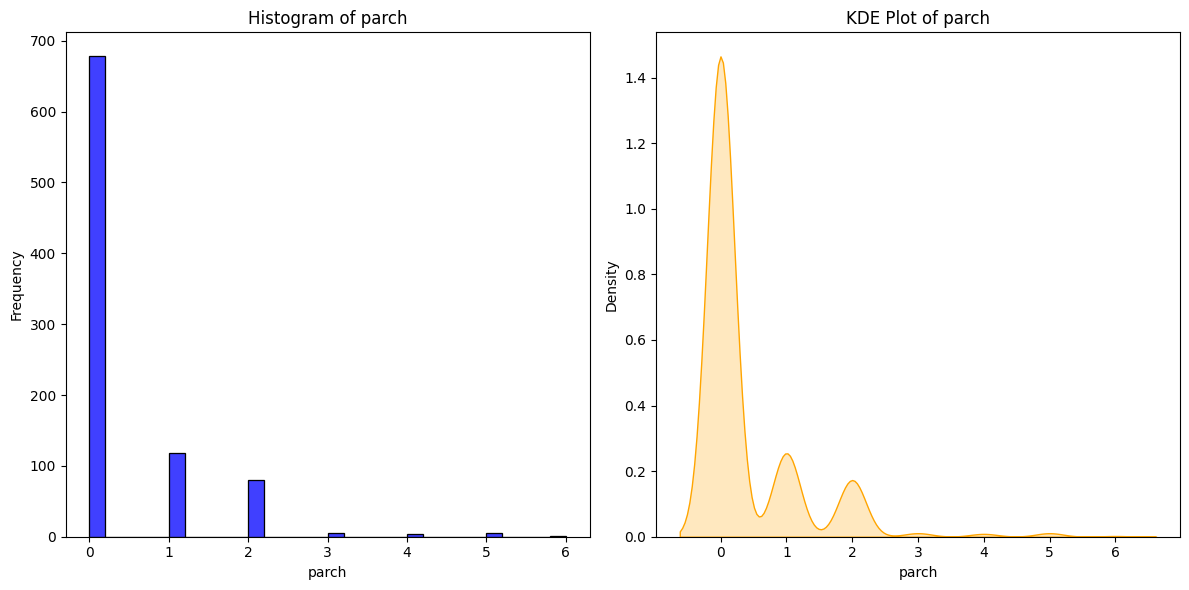

In [26]:
# Visualizing distribution of features

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['parch'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of parch')
plt.xlabel('parch')
plt.ylabel('Frequency')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch'], fill=True, color='orange')
plt.title('KDE Plot of parch')
plt.xlabel('parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

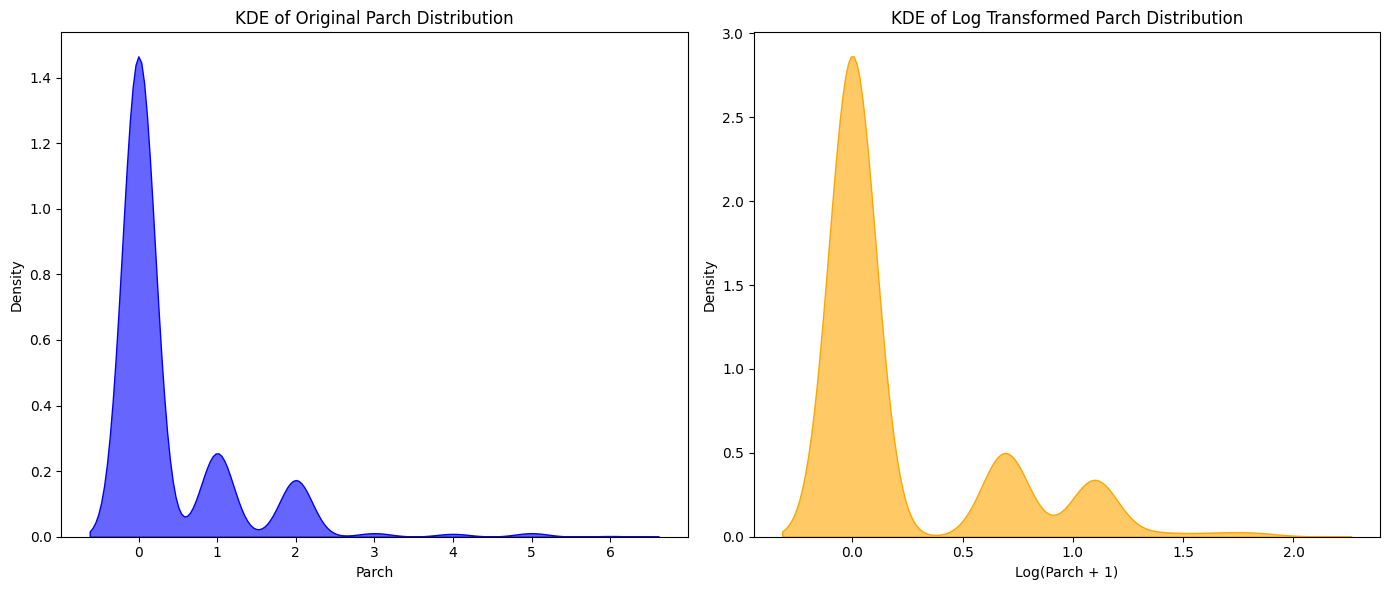

In [27]:
# Transforming feature 'Parch' to a normal distribution using log transformation
df['parch_log'] = np.log1p(df['parch'])  # log1p(x) is log(1+x)

# Step 3: Visualize the distributions using KDE
plt.figure(figsize=(14, 6))

# KDE plot for original parch
plt.subplot(1, 2, 1)
sns.kdeplot(df['parch'], fill=True, color='blue', alpha=0.6)
plt.title('KDE of Original Parch Distribution')
plt.xlabel('Parch')
plt.ylabel('Density')

# KDE plot for log transformed parch_log
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch_log'], fill=True, color='orange', alpha=0.6)
plt.title('KDE of Log Transformed Parch Distribution')
plt.xlabel('Log(Parch + 1)')
plt.ylabel('Density')

plt.tight_layout()

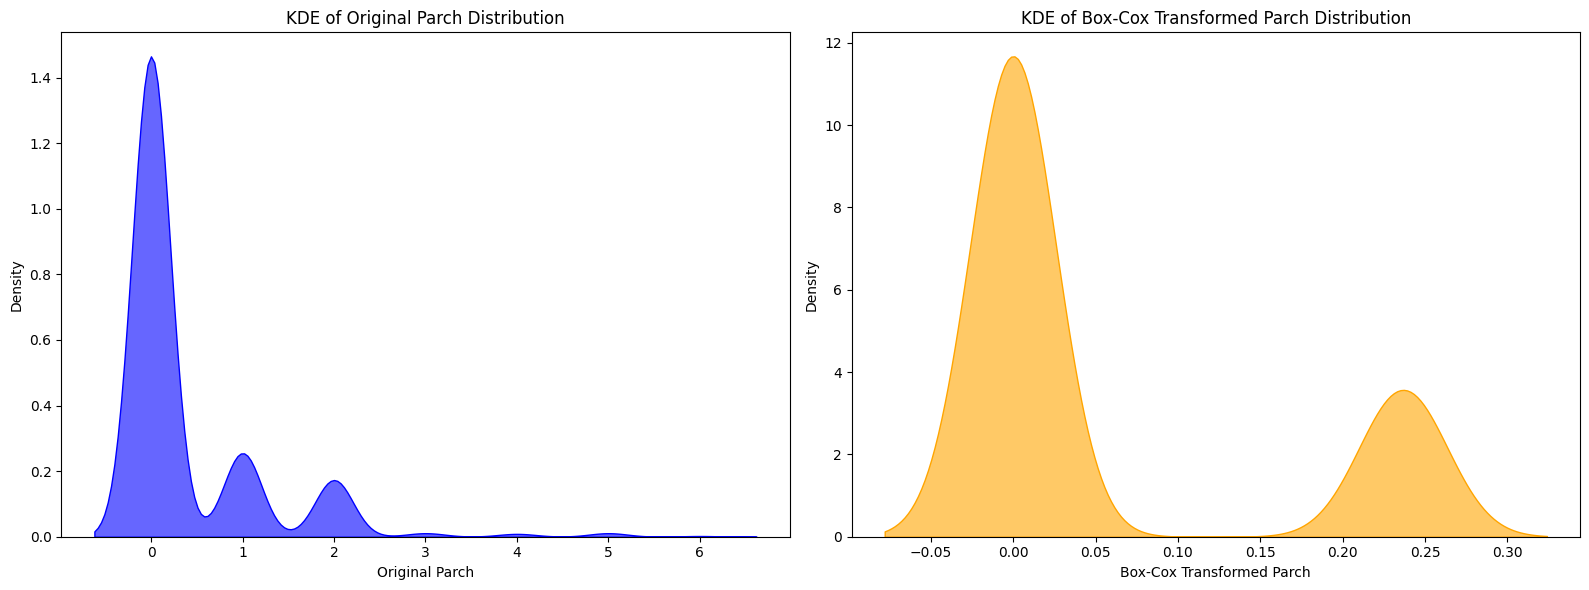

In [28]:
# Apply Box-Cox Transformation
# Box-Cox requires positive data, so we ensure 'parch' is > 0
# Since 'parch' is count data, we add a small constant
df['parch_shifted'] = df['parch'] + 1  # Shift by 1 to avoid zeros
df['parch_boxcox'], _ = stats.boxcox(df['parch_shifted'])

# Step 3: Visualize the distributions using KDE
plt.figure(figsize=(16, 6))

# KDE plot for original parch
plt.subplot(1, 2, 1)
sns.kdeplot(df['parch'], fill=True, color='blue', alpha=0.6)
plt.title('KDE of Original Parch Distribution')
plt.xlabel('Original Parch')
plt.ylabel('Density')

# KDE plot for Box-Cox transformed parch
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch_boxcox'], fill=True, color='orange', alpha=0.6)
plt.title('KDE of Box-Cox Transformed Parch Distribution')
plt.xlabel('Box-Cox Transformed Parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [29]:
#Use a minmax scaler for the numeric data

scaler=MinMaxScaler()
df[['age_scaled','fare_scaled']]=scaler.fit_transform(df[['age','fare']])

In [30]:
# print the data head to investigate the changes in the da
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,parch_log,parch_shifted,parch_boxcox,age_scaled,fare_scaled
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,0.0,1,0.0,0.271174,0.014151
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.0,1,0.0,0.472229,0.139136
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,0.0,1,0.0,0.321438,0.015469
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0,1,0.0,0.434531,0.103644
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,0.0,1,0.0,0.434531,0.015713


In [31]:
# Data enrichment

df['family_size'] = df['sibsp'] + df['parch'] + 1  # Adding 1 for the passenger themselves
df['is_alone'] = (df['family_size'] == 1).astype(int)  # 1 if alone, 0 otherwise
df['fare_per_person'] = df['fare'] / df['family_size']  # Average fare per person
df['is_child'] = (df['age'] < 18).astype(int)  # 1 if child, 0 otherwise

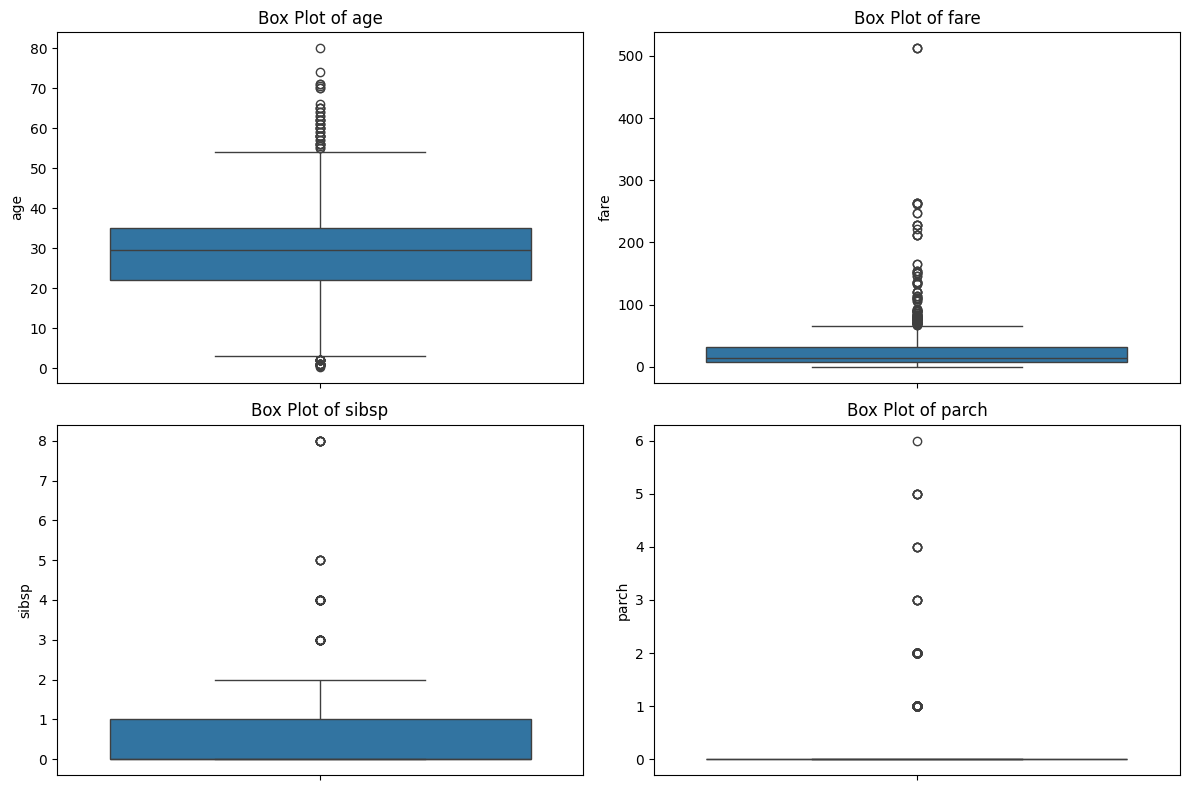

In [32]:
#inspect outliers in age, fare, sibsp and parch features

numerical_features = ['age', 'fare', 'sibsp', 'parch']
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound))

# --- Visualization: Box Plots ---
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

Go through your CWK1 Assessment.